In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

# Đọc dữ liệu

In [2]:
X_train = pd.read_csv('UIT-VSFC/train/sents.txt', sep='\0', header=None, index_col=None)
y_train = pd.read_csv('UIT-VSFC/train/sentiments.txt', sep='\0', header=None, index_col=None)

In [3]:
X_dev = pd.read_csv('UIT-VSFC/dev/sents.txt', sep='\0', header=None, index_col=None)
y_dev = pd.read_csv('UIT-VSFC/dev/sentiments.txt', sep='\0', header=None, index_col=None)

In [4]:
X_test = pd.read_csv('UIT-VSFC/test/sents.txt', sep='\0', header=None, index_col=None)
y_test = pd.read_csv('UIT-VSFC/test/sentiments.txt', sep='\0', header=None, index_col=None)

In [5]:
y_train_flattened = y_train.values.flatten()
y_dev_flattened = y_dev.values.flatten()
y_test_flattened = y_test.values.flatten()

## Mục đích/Tác vụ mà bộ dữ liệu hướng tới
* Bộ dữ liệu được thu thập từ các nhận xét, đánh giá, góp ý từ các sinh viên về chất lượng giảng dạy của giảng viên, các đánh giá được thể hiện dưới dạng một câu hoặc một đoạn văn ngắn với 3 loại nhãn là tích cực (positive), tiêu cực (negative) và trung tính (neural) và các nhận xét góp ý đó được phân loại thành các lớp ở phần topics.txt
    * File sents.txt sẽ chứa từng dòng là các chuỗi về nhận xét, đánh giá
    * File sentiments.txt sẽ chứa từng dòng là nhãn cho các chuỗi trong file sents.txt, 0 đại diện cho negative, 1 là neural và 2 là positive
    * File topics.txt sẽ chứa từng dòng là nhãn cho topic của phần đánh giá, các giá trị gồm có 0 (liên quan đến vấn đề giảng dạy), 1 (liên quan đến hướng dẫn lập trình), 2 (liên quan đến cơ sở vật chất), 3 (còn lại)
* Bộ dữ liệu được xây dựng nhầm phục vụ cho các các tác vụ:
    * Huấn luyện mô hình nhận diện được cảm xúc từ các đoạn văn bản, phục vụ cho các ứng dụng trong xử lý ngôn ngữ tự nhiên
    * Huấn luyện mô hình phân loại được các chủ đề, nội dung mà đoạn văn bản thuộc về

## Kích thước của dữ liệu trên các tập train, dev và test

In [6]:
print(f'Shape of Training Set:')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print('=' * 15)
print(f'Shape of Dev Set:')
print(f'X_dev: {X_dev.shape}')
print(f'y_dev: {y_dev.shape}')
print('=' * 15)
print(f'Shape of Test Set:')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shape of Training Set:
X_train: (11426, 1)
y_train: (11426, 1)
Shape of Dev Set:
X_dev: (1583, 1)
y_dev: (1583, 1)
Shape of Test Set:
X_test: (3166, 1)
y_test: (3166, 1)


## Phân bố nhãn trên từng tác vụ trên tập train, dev và test. Vẽ biểu đồ barplot thể hiện phân bố nhãn trên tập dữ liệu

In [ ]:
train_counts = np.bincount(y_train_flattened)
dev_counts = np.bincount(y_dev_flattened)
test_counts = np.bincount(y_test_flattened)

In [8]:
print('Label Distribution in: ')
print('=' * 15)
print('Training Set')
print(f'Negative: {train_counts[0]}')
print(f'Neural: {train_counts[1]}')
print(f'Positive: {train_counts[2]}')
print('=' * 15)
print('Dev Set')
print(f'Negative: {dev_counts[0]}')
print(f'Neural: {dev_counts[1]}')
print(f'Positive: {dev_counts[2]}')
print('=' * 15)
print(f'Negative: {test_counts[0]}')
print(f'Neural: {test_counts[1]}')
print(f'Positive: {test_counts[2]}')


Label Distribution in: 
Training Set
Negative: 5325
Neural: 458
Positive: 5643
Dev Set
Negative: 705
Neural: 73
Positive: 805
Negative: 1409
Neural: 167
Positive: 1590


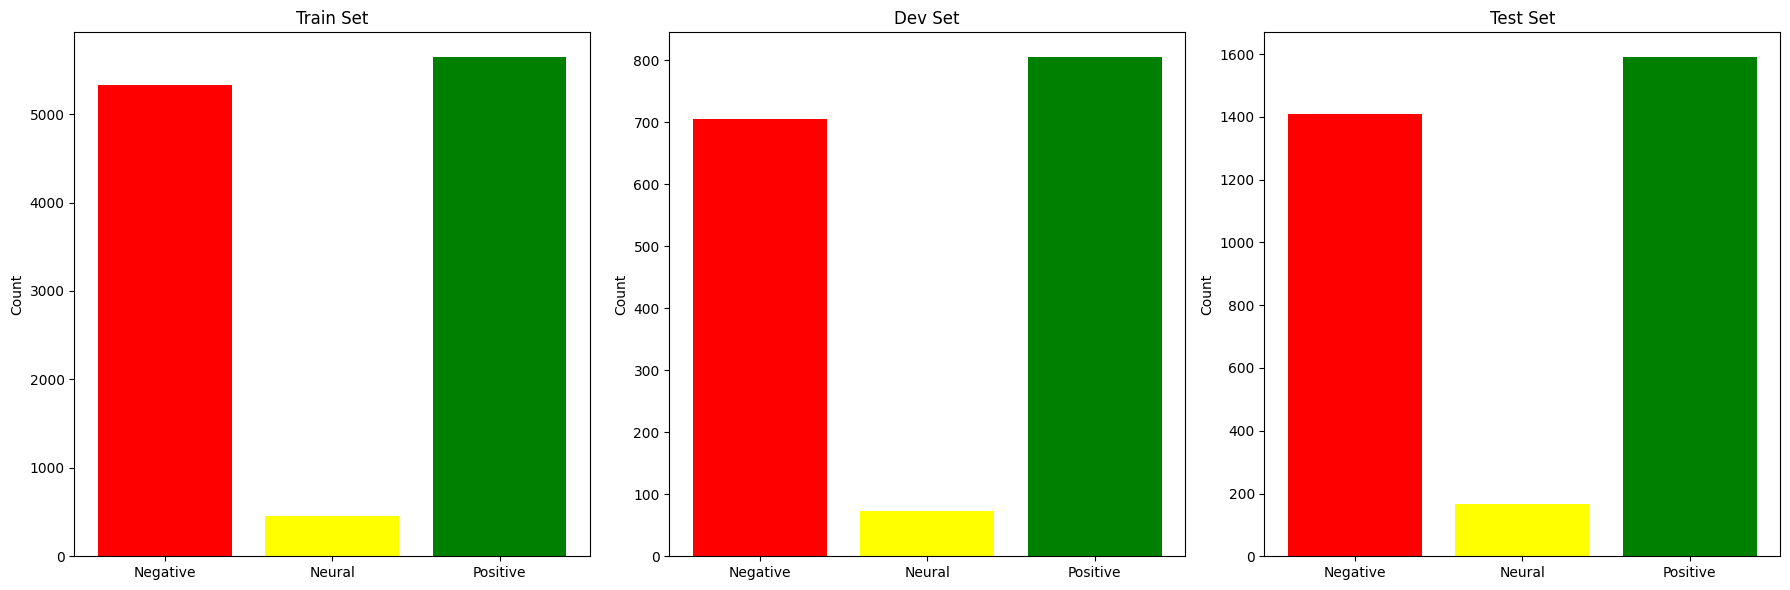

In [9]:
labels = ['Negative', 'Neural', 'Positive']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(labels, train_counts, color=['red', 'yellow', 'green'])
axes[0].set_title('Train Set')
axes[0].set_ylabel('Count')

axes[1].bar(labels, dev_counts, color=['red', 'yellow', 'green'])
axes[1].set_title('Dev Set')
axes[1].set_ylabel('Count')

axes[2].bar(labels, test_counts, color=['red', 'yellow', 'green'])
axes[2].set_title('Test Set')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Trích xuất đặc trưng cho tác vụ sentiment-based

In [10]:
X_train.dtypes

0    object
dtype: object

In [11]:
X_train = X_train.astype(str)

In [12]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train[0])
X_dev_vec = vectorizer.transform(X_dev[0])
X_test_vec = vectorizer.transform(X_test[0])

# Huấn luyện mô hình

## Sử dụng mô hình Logistic Regression và SVM

In [13]:
lr = LogisticRegression()
svm = SVC()

In [14]:
lr.fit(X_train_vec, y_train_flattened)
svm.fit(X_train_vec, y_train_flattened)

SVC()

## Đánh giá mô hình bằng các độ đo accuracy, precision, recall và f1

In [15]:
y_pred_lr = lr.predict(X_test_vec)
y_pred_svm = svm.predict(X_test_vec)

print('Logistic Regression')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_lr)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_lr, average='macro')}')
print('=' * 30)
print('SVM')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_svm)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_svm, average='macro')}')

Logistic Regression
Accuracy: 0.8847125710675932
Precision: 0.7622258735161961
Recall: 0.6883711194409748
F1-Score: 0.7071943843160944
SVM
Accuracy: 0.8859759949463045
Precision: 0.8134670819952211
Recall: 0.6388055283302992
F1-Score: 0.6358368786162855


## Vẽ ma trận nhầm lẫn của hai mô hình. Nhận xét về ma trận nhầm lẫn giữa hai mô hình huấn luyện

In [16]:
lr_confusion_mt = confusion_matrix(y_test_flattened, y_pred_lr)
svm_confusion_mt = confusion_matrix(y_test_flattened, y_pred_svm)

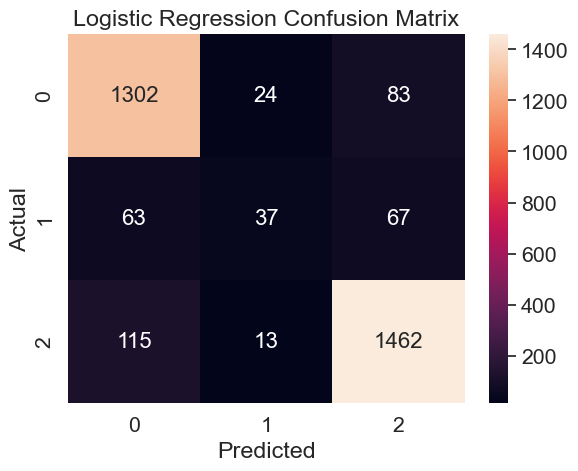

In [17]:
sns.set_theme(font_scale=1.4)
sns.heatmap(lr_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

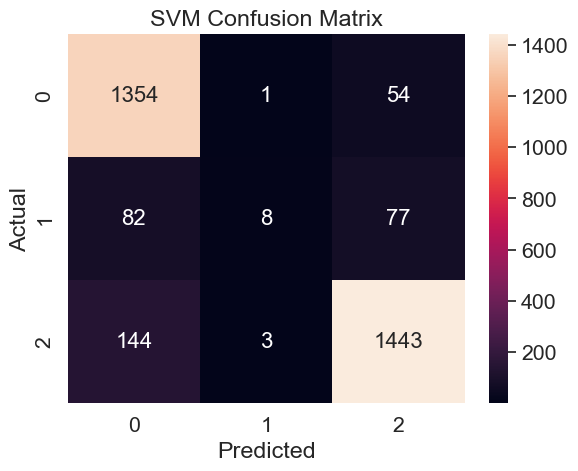

In [18]:
sns.set_theme(font_scale=1.4)
sns.heatmap(svm_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

### Nhận xét:

* Về độ chính xác, hai mô hình có kết quả khá tốt, khoảng 88.4% cho Logistic Regression và 88.6% cho SVM, tuy nhiên khi đi sâu vào các độ đo khác thì kết quả trên thật sự không quá ấn tượng
* Về phân bố dữ liệu, hai lớp Negative và Positive chiếm trọng số khá lớn, vì vậy khi phân loại, mô hình có xu hướng dự đoán bias về 2 lớp này mà bỏ qua lớp Neural, vì vậy khi nhìn vào các độ đo cũng như confusion matrix, thấy được rằng số trường hợp dự đoán đúng cho lớp Neural là khá ít
* Mặc dù SVM có độ chính xác nhỉnh hơn Logistic là khoảng 0.2%, tuy nhiên khi nhìn vào các độ đo như precision, recall, f1 và bảng confusion matrix thì độ hiệu quả của Logistic là tốt hơn, các độ đo precision, recall và f1 đều tốt hơn SVM, và đặc biệt đối với lớp Neural có số lượng nhãn thấp, thì số dự doán đúng cho nhãn này của Logistic tốt hơn hẳn so với SVM (37/167 và 8/167)

# Sử dụng TfidfVectorizer thay cho CountVectorizer, từ đó đưa ra nhận xét, so sánh hiệu năng của 2 phương pháp đối với mô hình phân lớp

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train[0])
X_dev_tfidf = vectorizer.transform(X_dev[0])
X_test_tfidf = vectorizer.transform(X_test[0])

In [21]:
lr_1 = LogisticRegression()
svm_1 = SVC()

In [22]:
lr_1.fit(X_train_tfidf, y_train_flattened)
svm_1.fit(X_train_tfidf, y_train_flattened)

SVC()

In [23]:
y_pred_lr = lr_1.predict(X_test_vec)
y_pred_svm = svm_1.predict(X_test_vec)

print('Logistic Regression')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_lr)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_lr, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_lr, average='macro')}')
print('=' * 30)
print('SVM')
print(f'Accuracy: {accuracy_score(y_test_flattened, y_pred_svm)}')
print(f'Precision: {precision_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'Recall: {recall_score(y_test_flattened, y_pred_svm, average='macro')}')
print(f'F1-Score: {f1_score(y_test_flattened, y_pred_svm, average='macro')}')

Logistic Regression
Accuracy: 0.8761844598862919
Precision: 0.7938802926006551
Recall: 0.6519385857020376
F1-Score: 0.6654898945893791
SVM
Accuracy: 0.5050536955148452
Precision: 0.7874312873153587
Recall: 0.38385687392082923
F1-Score: 0.30696851268249886


In [24]:
lr_confusion_mt = confusion_matrix(y_test_flattened, y_pred_lr)
svm_confusion_mt = confusion_matrix(y_test_flattened, y_pred_svm)

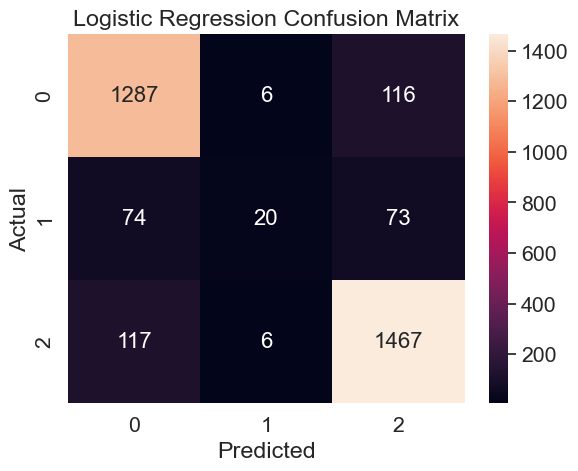

In [25]:
sns.set_theme(font_scale=1.4)
sns.heatmap(lr_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

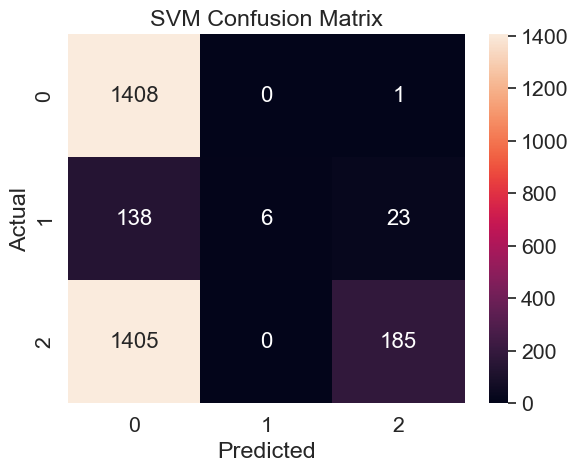

In [26]:
sns.set_theme(font_scale=1.4)
sns.heatmap(svm_confusion_mt, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

## Nhận xét
* Khi sử dụng phương pháp TfidfVectorizer để trích xuất đặc trưng, hai mô hình có kết quả về các độ đo tệ hơn so với việc dùng CountVectorizer
* Đối với Logistic Regression, độ chính xác giảm khoảng 1%, mô hình dự đoán sai các nhãn 0 và 1 nhiều hơn, tuy nhiên không quá đáng kể
* Ngược lại, đối với SVM, việc sử dụng Tfidf làm cho mô hình phân loại và dự đoán trở nên vô cùng tệ khi độ chính xác chỉ còn lại 50%, và mô hình hoàn toàn bias về nhãn 0 như confusion matrix ở trên, việc nhãn 1 được dự đoán ít nhất thì ở phương pháp Count cũng đã xảy ra, tuy nhiên đối với nhãn 2, trong tổng cộng 1490 trường hợp thì mô hình chỉ dự đoán đúng duy nhất 185, tức là chỉ khoảng 10% nhãn 2 được dự đoán đúng mặc dù số lượng nhãn 2 gần như ngang so với nhãn 0 

# Lưu kết quả mô hình vừa huấn luyện thành file

In [27]:
import joblib

In [28]:
joblib.dump(lr, 'LogisticRegression_CountVectorizer.pkl')
joblib.dump(svm, 'SVM_CountVectorizer.pkl')
joblib.dump(lr_1, 'LogisticRegression_Tfidf.pkl')
joblib.dump(svm_1, 'SVM_Tfidf.pkl')

['SVM_Tfidf.pkl']

# Sử dụng thêm công cụ tách từ (word segmentation) cho tiếng Việt. Việc sử dụng công cụ này có ảnh hưởng tới hiệu năng của mô hình không

In [29]:
import pyvi.ViTokenizer

In [30]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [31]:
columns = ['Text', 'Label']

df_train = pd.concat([X_train, y_train], axis=1)
df_dev = pd.concat([X_dev, y_dev], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_train.columns, df_dev.columns, df_test.columns = columns, columns, columns

In [32]:
temp_arr = [df_train, df_dev, df_test]

for df in temp_arr:
    df['Text_Segmented'] = df['Text'].apply(lambda x: ' '.join(pyvi.ViTokenizer.tokenize(x).split()))

## CountVectorizer

In [33]:
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(df_train['Text_Segmented'])
X_dev = count_vectorizer.transform(df_dev['Text_Segmented'])
X_test = count_vectorizer.transform(df_test['Text_Segmented'])

y_train = df_train['Label']
y_dev = df_dev['Label']
y_test = df_test['Label']

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}')
print(f'Recall: {recall_score(y_test, y_pred, average='macro')}')
print(f'F1-Score: {f1_score(y_test, y_pred, average='macro')}')

Accuracy: 0.885028427037271
Precision: 0.7751587833171049
Recall: 0.6780510923553308
F1-Score: 0.6970329783077404


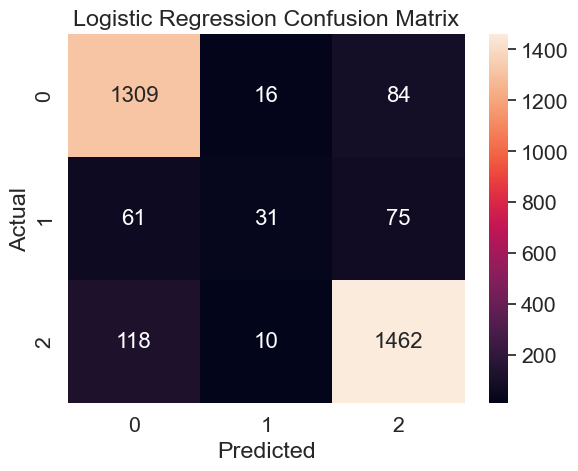

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.set_theme(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Nhận xét:
* Khi sử dụng công cụ word segmentation, cụ thể đối với bài này là pyvi, kết hợp sử dụng trích xuất đặc trưng count vectorizer thì mô hình có độ chính xác không thay đổi quá nhiều khi tăng khoảng 0.1%
* Cụ thể hơn khi nhìn vào confusion matrix, nếu sử dụng word segmentation thì số trường hợp dự đoán đúng nhãn 0 tăng thêm 7 trường hợp, tuy nhiên số trường hợp dự đoán đúng nhãn 1 giảm đi 6 trường hợp
* Từ đó cho thấy rằng số trường hợp đúng tăng lên không đáng kể và mô hình dự đoán sai nhiều hơn cho nhãn có phân bố ít nhất là nhãn 1

## TfidfVectorizer

In [37]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train['Text_Segmented'])
X_dev_tfidf = tfidf.transform(df_dev['Text_Segmented'])
X_test_tfidf = tfidf.transform(df_test['Text_Segmented'])

In [38]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average='macro')}')
print(f'Recall: {recall_score(y_test, y_pred, average='macro')}')
print(f'F1-Score: {f1_score(y_test, y_pred, average='macro')}')

Accuracy: 0.883133291219204
Precision: 0.7898487136293532
Recall: 0.6436871622352022
F1-Score: 0.6467517263582526


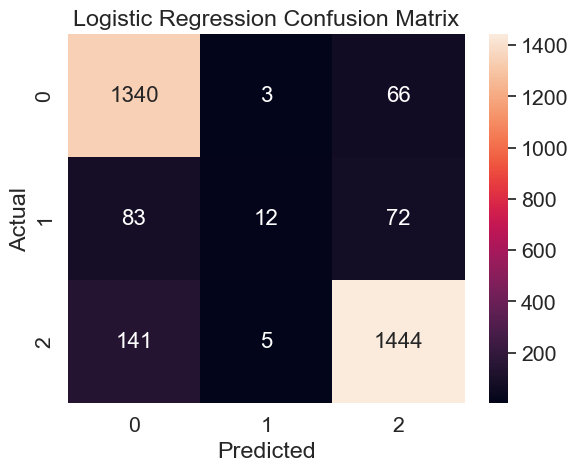

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.set_theme(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Nhận xét:
* Khi sử dụng pyvi và TfidfVectorizer, mô hình càng dự đoán thêm nhiều trường hợp đúng cho nhãn 0 và giảm đi khá nhiều trường hợp đúng cho nhãn 1, điều này chứng tỏ mô hình ngày càng thiên về hai nhãn có phân bố lớn là nhãn 0 và 2

# Hãy tìm cách điều chỉnh 2 siêu tham số của phương pháp trích xuất đặc trưng TfidfVectorizer là lowercase (true và false) và ngram_range (1 đến 3). Chọn ra bộ siêu tham số tốt nhất, và cho biết kết quả độ chính xác của mô hình trên bộ siêu tham số đó.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [42]:
X_train, y_train = df_train['Text'], df_train['Label']
X_test, y_test = df_test['Text'], df_test['Label']

In [43]:
model = LogisticRegression(max_iter=1000)

params_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__lowercase': [True, False]
}

tfidf = TfidfVectorizer()

pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('logreg', model)
])

In [44]:
grid_search = GridSearchCV(pipeline, param_grid=params_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'tfidf__lowercase': [True, False],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=2)

In [45]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

Best Parameters: {'tfidf__lowercase': True, 'tfidf__ngram_range': (1, 2)}
Best Cross-validation Score: 0.9074040252627065


In [47]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy on Testing set after finding optimal parameters: {acc}')
print(f'Precision on Testing set after finding optimal parameters: {prec}')
print(f'Recall on Testing set after finding optimal parameters: {rec}')
print(f'F1-Score on Testing set after finding optimal parameters: {f1_score}')

Accuracy on Testing set after finding optimal parameters: 0.8894504106127605
Precision on Testing set after finding optimal parameters: 0.8605358301659405
Recall on Testing set after finding optimal parameters: 0.6485802350688724
F1-Score on Testing set after finding optimal parameters: 0.6517866375700646


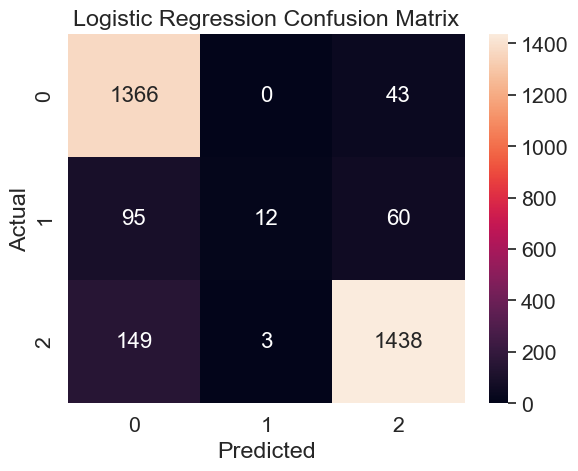

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.set_theme(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Hãy liệt kê các trường hợp dự đoán sai của mô hình. Cho biết nguyên nhân nào mô hình bị dự đoán sai. Hãy đề xuất phương pháp khắc phục (nếu có)

In [50]:
misclassified_idx = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]
misclassified_texts = X_test.iloc[misclassified_idx]
misclassified_labels = y_test.iloc[misclassified_idx]
misclassified_preds = y_pred[misclassified_idx]

for i in range(len(misclassified_texts)):
    print(f"Text: {misclassified_texts.iloc[i]}")
    print(f"Predicted: {misclassified_preds[i]}, Actual: {misclassified_labels.iloc[i]}")
    print("-" * 50)

Text: tính điểm thi đua các nhóm .
Predicted: 0, Actual: 2
--------------------------------------------------
Text: trong trường macbook thầy số hai thì không có máy nào số một .
Predicted: 0, Actual: 2
--------------------------------------------------
Text: cách mà cô tiếp cận với sinh viên .
Predicted: 2, Actual: 1
--------------------------------------------------
Text: phòng học thoáng mát , trang thiết bị đầy đủ .
Predicted: 0, Actual: 2
--------------------------------------------------
Text: môn học này giúp chúng em hiểu ra những vấn đề cơ bản .
Predicted: 2, Actual: 1
--------------------------------------------------
Text: ổn .
Predicted: 2, Actual: 1
--------------------------------------------------
Text: phần lớn chỉ là lý thuyết và bài tập .
Predicted: 0, Actual: 2
--------------------------------------------------
Text: như vậy tụi em sẽ định hướng tốt hơn và tập trung vào những thứ cần thiết .
Predicted: 0, Actual: 1
--------------------------------------------------
T

## Nhận xét:
* Mô hình thường dự đoán sai đối với dữ liệu quá ngắn. Vì mô hình không thể áp dụng các đặc trưng được học trong quá trình huấn luyện lên nên khả năng dự đoán sai là cao
* Có một vài trường hợp nhãn thực sự không tương thích với dữ liệu, ví dụ như 'phần lớn chỉ là lý thuyết và bài tập' và nhãn lại 2 (nên là 1) hoặc 'ví dụ phù hợp với nội dung kiến thức, hướng dẫn chi tiết' và nhãn lại 1 (nên là 2) hoặc 'cô hoàng toàn không dùng courses hay các phương tiện liên lạc thông báo' lại có nhãn là 2 (nên là 0)
* Và có những trường hợp sử dụng ngữ điệu khá hiện đại nên mô hình không thể nhìn ra được ngữ cảnh trọn vẹn như 'trong trường macbook thầy số hai thì không có máy nào số một'